Path: [(0, 0), (1, 0), (2, 0), (2, 1), (3, 1), (4, 1), (4, 2), (4, 3), (4, 4)]


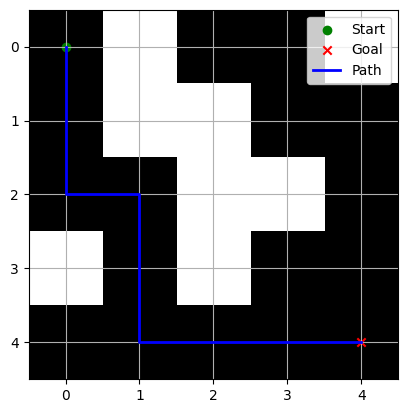


Following the path:
Moving to: (0, 0)
Moving to: (1, 0)
Moving to: (2, 0)
Moving to: (2, 1)
Moving to: (3, 1)
Moving to: (4, 1)
Moving to: (4, 2)
Moving to: (4, 3)
Moving to: (4, 4)


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import heapq

# Create the home grid map
# 0 = open path, 1 = obstacle
# sample 5 by 5 map can eb expanded upon this is just for demo purposes
home_map = [
    [0, 1, 0, 0, 1],
    [0, 1, 1, 0, 0],
    [0, 0, 1, 1, 0],
    [1, 0, 1, 0, 0],
    [0, 0, 0, 0, 0]
]

START = (0, 0)  # Sample Start position (top-left corner)
GOAL = (4, 4 )   # Sample Goal position (bottom-right corner)

# A* algorithm
def astar(start, goal, grid):
    rows, cols = len(grid), len(grid[0])
    open_list = []
    heapq.heappush(open_list, (0, start))  # (cost, (x, y))

    came_from = {}
    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}

    while open_list:
        _, current = heapq.heappop(open_list)

        if current == goal:
            return reconstruct_path(came_from, current)

        neighbors = get_neighbors(current, rows, cols)
        for neighbor in neighbors:
            if grid[neighbor[0]][neighbor[1]] == 1:  # obstacle
                continue

            tentative_g_score = g_score[current] + 1

            if tentative_g_score < g_score.get(neighbor, float('inf')):
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                heapq.heappush(open_list, (f_score[neighbor], neighbor))

    return None  # No path found

def heuristic(a, b):
    # Manhattan distance
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def get_neighbors(pos, rows, cols):
    x, y = pos
    neighbors = []
    if x > 0: neighbors.append((x - 1, y))  # Up
    if x < rows - 1: neighbors.append((x + 1, y))  # Down
    if y > 0: neighbors.append((x, y - 1))  # Left
    if y < cols - 1: neighbors.append((x, y + 1))  # Right
    return neighbors

def reconstruct_path(came_from, current):
    path = [current]
    while current in came_from:
        current = came_from[current]
        path.append(current)
    path.reverse()
    return path

# Find the path
path = astar(START, GOAL, home_map)
print("Path:", path)

# Visualization
def plot_map(home_map, path=None):
    grid = np.array(home_map)
    plt.imshow(grid, cmap="gray", origin="upper")

    # Plot start and goal
    plt.scatter(START[1], START[0], marker='o', color='green', label='Start')
    plt.scatter(GOAL[1], GOAL[0], marker='x', color='red', label='Goal')

    # Plot path
    if path:
        path_x = [p[1] for p in path]
        path_y = [p[0] for p in path]
        plt.plot(path_x, path_y, color='blue', linewidth=2, label='Path')

    plt.legend()
    plt.grid(True)
    plt.show()

plot_map(home_map, path)

import time

def follow_path(path):
    for step in path:
        print(f"Moving to: {step}")
        time.sleep(0.5)  # Simulate delay for movement

if path:
    print("\nFollowing the path:")
    follow_path(path)
else:
    print("\nNo path found.")



Path: None


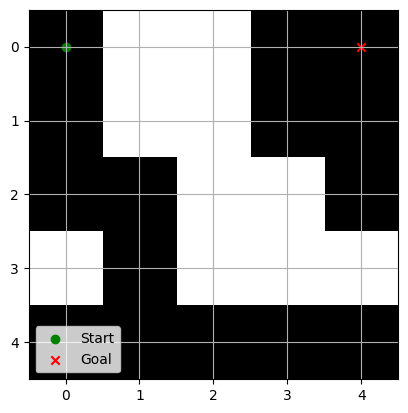


No path found.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import heapq

# Create the home grid map
# 0 = open path, 1 = obstacle
# sample 5 by 5 map can eb expanded upon this is just for demo purposes
home_map = [
    [0, 1, 1, 0, 0],
    [0, 1, 1, 0, 0],
    [0, 0, 1, 1, 0],
    [1, 0, 1, 1, 1],
    [0, 0, 0, 0, 0]
]

START = (0, 0)  # Sample Start position (top-left corner)
GOAL = (0, 4 )   # Sample Goal position (top-right corner)

# A* algorithm
def astar(start, goal, grid):
    rows, cols = len(grid), len(grid[0])
    open_list = []
    heapq.heappush(open_list, (0, start))  # (cost, (x, y))

    came_from = {}
    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}

    while open_list:
        _, current = heapq.heappop(open_list)

        if current == goal:
            return reconstruct_path(came_from, current)

        neighbors = get_neighbors(current, rows, cols)
        for neighbor in neighbors:
            if grid[neighbor[0]][neighbor[1]] == 1:  # obstacle
                continue

            tentative_g_score = g_score[current] + 1

            if tentative_g_score < g_score.get(neighbor, float('inf')):
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                heapq.heappush(open_list, (f_score[neighbor], neighbor))

    return None  # No path found

def heuristic(a, b):
    # Manhattan distance
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def get_neighbors(pos, rows, cols):
    x, y = pos
    neighbors = []
    if x > 0: neighbors.append((x - 1, y))  # Up
    if x < rows - 1: neighbors.append((x + 1, y))  # Down
    if y > 0: neighbors.append((x, y - 1))  # Left
    if y < cols - 1: neighbors.append((x, y + 1))  # Right
    return neighbors

def reconstruct_path(came_from, current):
    path = [current]
    while current in came_from:
        current = came_from[current]
        path.append(current)
    path.reverse()
    return path

# Find the path
path = astar(START, GOAL, home_map)
print("Path:", path)

# Visualization
def plot_map(home_map, path=None):
    grid = np.array(home_map)
    plt.imshow(grid, cmap="gray", origin="upper")

    # Plot start and goal
    plt.scatter(START[1], START[0], marker='o', color='green', label='Start')
    plt.scatter(GOAL[1], GOAL[0], marker='x', color='red', label='Goal')

    # Plot path
    if path:
        path_x = [p[1] for p in path]
        path_y = [p[0] for p in path]
        plt.plot(path_x, path_y, color='blue', linewidth=2, label='Path')

    plt.legend()
    plt.grid(True)
    plt.show()

plot_map(home_map, path)

import time

def follow_path(path):
    for step in path:
        print(f"Moving to: {step}")
        time.sleep(0.5)  # Simulate delay for movement

if path:
    print("\nFollowing the path:")
    follow_path(path)
else:
    print("\nNo path found.")
